# Data Pre-processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data1 = pd.read_csv(r"D:/FYP_ML/AI_DATA/S1_1_8_001.txt", names=["Timestamp", "Position", "Reaction Force","Apllied Force","Impedence"])

# Feature Extraction

In [3]:
initial_timestamp = raw_data1["Timestamp"][1]

In [4]:
initial_timestamp

-131275641

In [5]:
raw_data1["Timestamp"] = (raw_data1["Timestamp"] - initial_timestamp)/10e5

In [6]:
raw_data1["Timestamp"] 

0         -0.000067
1          0.000000
2          0.000038
3          0.000075
4          0.000112
            ...    
349995    11.473237
349996    11.473269
349997    11.473302
349998    11.473335
349999    11.473367
Name: Timestamp, Length: 350000, dtype: float64

In [7]:
x_r = pd.DataFrame({'Position':raw_data1['Position']})
f_r = pd.DataFrame({'Reaction Force':raw_data1['Reaction Force']})
f_r = pd.DataFrame({'Impedence':raw_data1['Impedence']})

In [8]:
raw_data1

,Timestamp,Position,Reaction Force,Apllied Force,Impedence
0,-0.000067,0.000000,0.000000,0.8,0.000000
1,0.000000,0.000000,0.010720,0.8,0.000000
2,0.000038,0.000000,0.016719,0.8,0.000000
3,0.000075,0.000000,0.022515,0.8,0.000000
4,0.000112,0.000000,0.028268,0.8,0.000000
...,...,...,...,...,...
349995,11.473237,0.001405,0.799474,0.8,569.217474
349996,11.473269,0.001405,0.799478,0.8,569.219824
349997,11.473302,0.001405,0.799481,0.8,569.222232
349998,11.473335,0.001405,0.799484,0.8,569.224625


In [9]:
start1 = np.where([raw_data1['Timestamp']<2])
start1 = start1[1][-1]

end1 = np.where([raw_data1['Timestamp']>8])
end1 = end1[1][0]


In [10]:
sliced_data1 = raw_data1[start1+1:end1]
sliced_data1

,Timestamp,Position,Reaction Force,Apllied Force,Impedence
61117,2.000030,0.001380,0.807983,0.8,585.697319
61118,2.000063,0.001380,0.807589,0.8,585.411876
61119,2.000095,0.001380,0.807214,0.8,585.140026
61120,2.000127,0.001380,0.806846,0.8,584.872946
61121,2.000159,0.001380,0.806484,0.8,584.610565
...,...,...,...,...,...
243784,7.999869,0.001514,0.793226,0.8,523.762255
243785,7.999901,0.001514,0.793252,0.8,523.779632
243786,7.999934,0.001514,0.793279,0.8,523.797588
243787,7.999966,0.001514,0.793306,0.8,523.815029


In [11]:
t = sliced_data1['Timestamp'] 
x_r = sliced_data1['Position'] - sliced_data1['Position'].mean()
f_r= sliced_data1['Reaction Force']-sliced_data1['Reaction Force'].mean()
z = sliced_data1['Impedence']

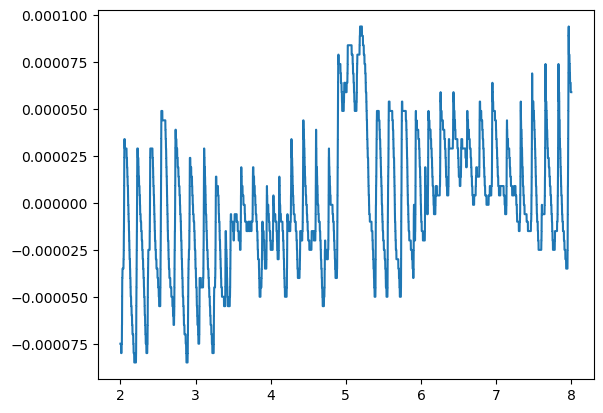

In [12]:
fig = plt.figure()
plt.plot(t,x_r)
#plt.plot(Timestamp2,Rotary_disp2)

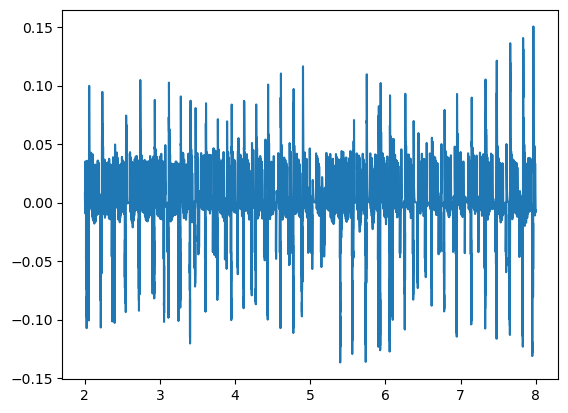

In [13]:
fig = plt.figure()
plt.plot(t,f_r)
#plt.plot(Timestamp2,Rotary_disp2)

In [14]:
sliced_data1['Timestamp'] = sliced_data1['Timestamp'] - sliced_data1.iloc[0]['Timestamp']
sliced_data1

,Timestamp,Position,Reaction Force,Apllied Force,Impedence
61117,0.000000,0.001380,0.807983,0.8,585.697319
61118,0.000033,0.001380,0.807589,0.8,585.411876
61119,0.000065,0.001380,0.807214,0.8,585.140026
61120,0.000097,0.001380,0.806846,0.8,584.872946
61121,0.000129,0.001380,0.806484,0.8,584.610565
...,...,...,...,...,...
243784,5.999839,0.001514,0.793226,0.8,523.762255
243785,5.999871,0.001514,0.793252,0.8,523.779632
243786,5.999904,0.001514,0.793279,0.8,523.797588
243787,5.999936,0.001514,0.793306,0.8,523.815029


# Slicing and Writing to seperate files (30000 per file)

In [15]:
#Slice_count = np.where([sliced_data1['Timestamp']<=4])
#Slice_count = Slice_count[1][-1]
Slice_count = 30000
g_velocity = 100;
g_acceleration = 100;

In [17]:
for i in range(5):
    df2 = sliced_data1[i*(Slice_count):(i+1)*(Slice_count)]
    df2['Timestamp'] = df2['Timestamp'] - df2.iloc[0]['Timestamp']
    df2['Position'] = df2['Position'] - df2['Position'].mean() 
    df2['Reaction Force'] = df2['Reaction Force'] - df2['Reaction Force'].mean()
    df2['Velocity']= 0
    df2['Position_sum']= 0
    df2['Velocity_sum']= 0
    df2['Stiffness']= df2['Impedence']
    df2['Acceleration']= 0
    for k in range(1,len(df2)):
        df2['Position_sum'][k]= df2['Position_sum'][k-1]+df2['Velocity'][k-1]*(df2['Timestamp'][k]-df2['Timestamp'][k-1])
        df2['Velocity'][k]= g_velocity*(df2['Position'][k]-df2['Position_sum'][k])
        df2['Velocity_sum'][k]= df2['Velocity_sum'][k-1]+df2['Acceleration'][k-1]*(df2['Timestamp'][k]-df2['Timestamp'][k-1])
        df2['Acceleration'][k]= g_acceleration*(df2['Velocity'][k]-df2['Velocity_sum'][k])
    df2['F*x area'] = df2['Reaction Force']*df2['Position']
    df2 = df2.drop('Impedence',axis=1)
    df2 = df2.drop('Position_sum',axis=1)
    df2 = df2.drop('Velocity_sum',axis=1)
    df2 = df2.drop('Apllied Force',axis=1)
    df2 = df2.drop('Timestamp',axis=1)
    df2.to_csv("D:\FYP_ML\Processed Data\S1\S1_" + str(i+802) +".csv",index=False)


KeyError: 0

In [2358]:
len(data)

30000